In [1]:
df = pd.read_csv("./train.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## SibSp와 Survived의 관계 살펴보기

형제 자매, 배우자의 수가 많을 수록 생존률은 떨어질 것이라 생각된다.

In [2]:
df[["SibSp", "Survived"]].groupby("SibSp").count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [3]:
df[["SibSp", "Survived"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


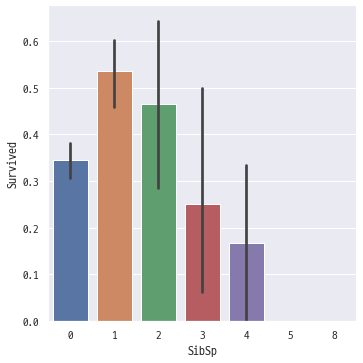

In [4]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=df)
plt.show()

SibSp와 Survived는 반비례하지 않았고, 오히려 1 <= SibSp <= 2에서 생존률이 가장 높게 나타났다.

여기에 Pclass를 변수로 추가해서 관계를 살펴볼 수 있을 것 같다.

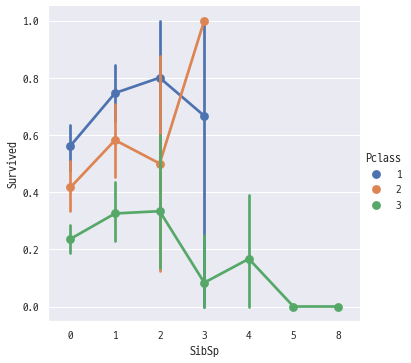

In [5]:
sns.catplot(x="SibSp", y="Survived", hue="Pclass", kind="point", data=df)
plt.show()

이 경우에는 똑같은 barplot보다는 pointplot이 결과를 보기 더 좋아보였다.  
Pclass 등급이 좋을 수록 생존률이 높다는 것을 알 수 있다.  
그리고 SibSp > 3 이상인 데이터는 3등급에만 있다는 것도 보인다.  

## Parch와 Survived의 관계 살펴보기

같은 방법으로 Parch와 Survived의 관계도 살펴볼 수 있을 것 같다.  
결과도 비슷하게 나타날 것으로 생각된다.

In [6]:
df[["Parch", "Survived"]].groupby("Parch").count()

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [7]:
df[["Parch", "Survived"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


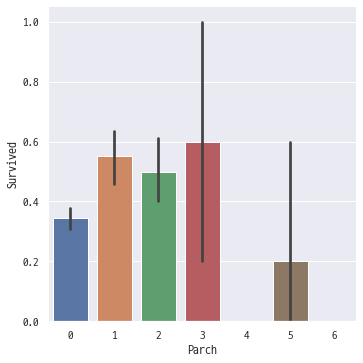

In [8]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=df)
plt.show()

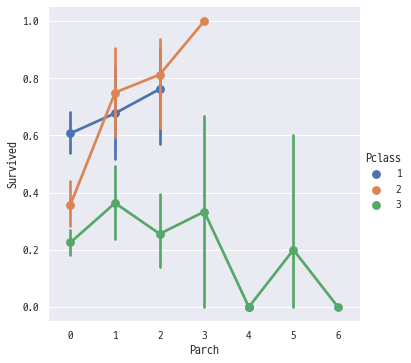

In [9]:
sns.catplot(x="Parch", y="Survived", hue="Pclass", kind="point", data=df)
plt.show()

Parch는 SipSp와 다르게 1 <= Parch <= 3에서 생존률이 높게 나타났다.  
그리고 Parch > 1일 때, 2등급이 1등급보다 생존률이 높다는 것이 특이하다.  
3등급은 Parch <= 3일때, Parch와 생존률에 특별한 상관관계가 없어 보인다.  


Parch와 SibSp의 결과가 비슷하게 나타날 것이라 생각했는데,  
소규모의 가족의 생존률이 혼자 탑승한 경우나 대가족보다 높다는 것은 공통적이었으나,  
세세한 몇몇 부분에서는 차이가 있음을 확인할 수 있었다.

## 5월 15일 추가

SibSp와 Parch를 합친 FamilySize 변수와, 혼자 탑승했는지 여부를 표시하는 IsAlone 변수를 만들어 봄

In [10]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = 0
df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


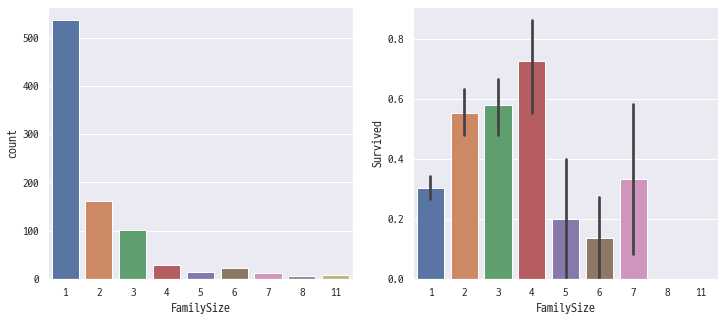

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="FamilySize", data=df, ax=ax1)
sns.barplot(x="FamilySize", y="Survived", data=df, ax=ax2)
plt.show()

2~4인 가족의 생존률이 높다.

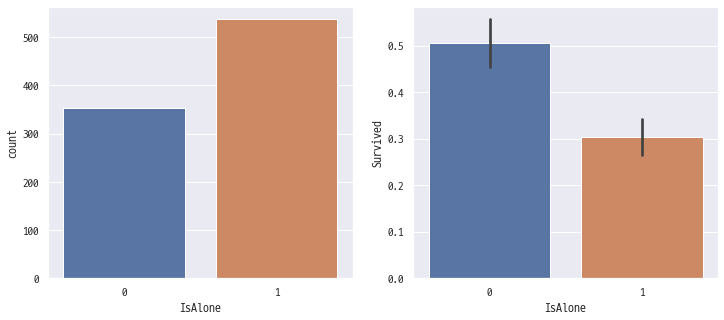

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="IsAlone", data=df, ax=ax1)
sns.barplot(x="IsAlone", y="Survived", data=df, ax=ax2)
plt.show()

혼자 탑승한 사람의 생존률이 더 낮다.